In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns


In [4]:
# Importing Dataset
dataset = pd.read_csv('Data.csv')

# Selects the Category with the highest value for each row
dataset['Max'] = dataset[['affiliative', 'selfenhancing',
                         'agressive', 'selfdefeating']].idxmax(axis=1)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,Max
0,2,2,3,1,4,5,4,3,4,3,...,2,2,4.0,3.5,3.0,2.3,25,2,100,affiliative
1,2,3,2,2,4,4,4,3,4,3,...,3,1,3.3,3.5,3.3,2.4,44,2,90,selfenhancing
2,3,4,3,3,4,4,3,1,2,4,...,4,2,3.9,3.9,3.1,2.3,50,1,75,affiliative
3,3,3,3,4,3,5,4,3,-1,4,...,3,3,3.6,4.0,2.9,3.3,30,2,85,selfenhancing
4,1,4,2,2,3,5,4,1,4,4,...,4,2,4.1,4.1,2.9,2.0,52,1,80,affiliative


In [13]:
def Processing(Data):
    X1 = Data.iloc[:, 0:32]
    X2 = Data.iloc[:, 36:39]
    X = pd.concat([X1, X2], axis=1)
    Y = Data.iloc[:, -1]
    return X, Y

In [12]:
# Taking care of missing data
def MissingValues(X):
    imputer = SimpleImputer(missing_values=-1, strategy='mean')
    imputer = imputer.fit(X)
    X = imputer.transform(X)
    return X

In [15]:
# Splitting the dataset into Training and Test set
def SplitingData(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=0)
    return X_train, X_test, Y_train, Y_test

In [16]:
def NaiveBayes(X_train, X_test, y_train, y_test):
    classifier = CategoricalNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average=None)
    print(classification_report(y_test,y_pred))

    return cm, ac, f1

In [17]:
def main(Type):
    X, Y = Processing(Type)

    X = MissingValues(X)

    X_train, X_test, Y_train, Y_test = SplitingData(
        X, Y)

    cm, ac, f1 = NaiveBayes(X_train, X_test,
                            Y_train, Y_test)

    return cm, ac, f1

               precision    recall  f1-score   support

  affiliative       0.89      0.93      0.91       169
    agressive       0.25      0.67      0.36         6
selfdefeating       0.50      0.33      0.40         6
selfenhancing       0.76      0.38      0.51        34

     accuracy                           0.82       215
    macro avg       0.60      0.58      0.55       215
 weighted avg       0.84      0.82      0.82       215

Total Accuracy of the Model is: 0.8232558139534883
Total F1 Scores of the Model is: [0.91066282 0.36363636 0.4        0.50980392]


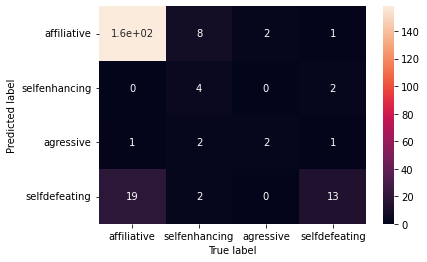

In [18]:
cm, ac, f1 = main(dataset)

sns.heatmap(cm, annot=True, xticklabels=dataset.iloc[:, -8:-4].columns,
            yticklabels=dataset.iloc[:, -8:-4].columns)
plt.xlabel("True label")
plt.ylabel("Predicted label")
print(f'Total Accuracy of the Model is: {ac}')
print(f'Total F1 Scores of the Model is: {f1}')